<a href="https://colab.research.google.com/github/teethavattcp/teethavat_port_data/blob/main/05_DemandForecasting_04_Lumpy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import time

# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
!pip install pandasql

In [ ]:
import pandasql

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
from pathlib import Path

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import statsmodels.tsa.stattools as smt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation

from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau,TensorBoard

In [ ]:
!pip install pystan

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
from sklearn.model_selection import ParameterGrid

#Define fn for cleaning raw data

##count_total_duplicates(df)

In [ ]:
def count_total_duplicates(df):
    # Identifying duplicate rows (excluding the first occurrence)
    duplicates = df.duplicated(keep='first')

    # Summing the number of duplicate rows
    total_duplicates = duplicates.sum()

    return total_duplicates

In [ ]:
# Example usage
data = {
    'A': ['foo', 'bar', 'foo', 'baz', 'foo'],
    'B': ['one', 'one', 'two', 'two', 'one'],
    'C': [1, 2, 3, 4, 1],
    'D': [5, 6, 7, 8, 5]
}
df_test = pd.DataFrame(data)
df_test

,A,B,C,D
0,foo,one,1,5
1,bar,one,2,6
2,foo,two,3,7
3,baz,two,4,8
4,foo,one,1,5


In [ ]:
total_duplicates = count_total_duplicates(df_test)
print(f'Total number of duplicate rows: {total_duplicates}')

Total number of duplicate rows: 1


##check_duplication_in_df(df)

In [ ]:
def check_duplication_in_df(df):
  total_duplicates = count_total_duplicates(df)
  if total_duplicates > 0:
    print(f"There are {total_duplicates} duplicate rows in the DataFrame.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows were dropped.")
    print("New shape of dataframe after dropping duplicate rows:",df.shape)
  elif total_duplicates == 0:
    print("No duplicate rows found.")

## format_number(x)

In [ ]:
def format_number(x):
    if isinstance(x, float):
        if x.is_integer():
            return '{:.0f}'.format(x)  # Convert to integer if it's a whole number
        else:
            return '{:.2f}'.format(x)  # Keep as float with 2 decimal places
    return x

## explore_df(df_for_eda)

In [ ]:
def explore_df(df_for_eda):
  print("#Check shape")
  print(df_for_eda.shape,"\n")

  print("#Check duplication")
  check_duplication_in_df(df_for_eda)

  print("\n#Check missing value")
  if df_for_eda.isnull().sum().sum() == 0:
    print("No missing values found.")
  else:
    print("Missing values found:", df_for_eda.isnull().sum().sum())
    print("\nNumber of missing values:\n",df_for_eda.isnull().sum())
    print("\nPercentage of missing values:\n",df_for_eda.isnull().sum()/len(df_for_eda)*100)

  print("\n#Check data type")
  print(df_for_eda.info(),"\n")

  print("\n#Check unique value")
  print(df_for_eda.nunique(),"\n")

  print("#List of column name:\n",df_for_eda.columns.tolist())

## explore_classes_in_df(df,df_col_cat)

In [ ]:
def explore_classes_in_df(df,df_col_cat):
  for col in df_col_cat:
    print ("\n-------- %s --------" % col)
    print (df[col].value_counts())

In [ ]:
def explore_distribution_in_df(df,df_col_num):
  for col in df_col_num:
    #histogram plot
    #plt.figure(figsize=(2.5, 1.25))
    print ("\n-------- %s --------" % col)

    # Create the histogram plot to calculate the max count
    hist = sns.histplot(df[col])

    # Calculate the maximum count (frequency)
    max_count = hist.patches[0].get_height()  # Initialize with the first bar's height
    for bar in hist.patches:
        if bar.get_height() > max_count:
            max_count = bar.get_height()

    # Clear the current plot to redraw with y-axis limit
    plt.clf()

    # Create the histogram plot again
    sns.histplot(df[col])

    # Set the maximum limit for the y-axis
    plt.ylim(top=1.3 * max_count)

    # Display the plot
    plt.title(f'Histogram of {col}')
    plt.show()

    #box plot
    #plt.figure(figsize=(2.5, 1.25))
    plt.clf()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## deepexploredf(df,df_col_cat, df_col_num)

In [ ]:
import matplotlib.cm as cm

In [ ]:
def deepexploredf(df,df_col_cat, df_col_num):
  print("##Explore categorical data")
  if len(df_col_cat) == 0:
    print("No categorical column found.")
  else:
    explore_classes_in_df(df,df_col_cat)

  print("\n##Explore numerical data")
  if len(df_col_num) == 0:
    print("No numerical data found.")
  else:
    print("#Check statistical summary")
    print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())
    print("#Check correlation")
    #plt.figure(figsize = (2,1.25))
    #plt.rcParams.update({'font.size': 10})
    sns.heatmap(df[df_col_num].corr(), annot =True, cmap=cm.coolwarm_r, vmin=-1, vmax=1)
    plt.show()
    #sns.pairplot(df[df_col_num])
    #plt.show()

## export_to_csv(path_of_folder,file_name,df)

In [ ]:
def export_to_csv(path_of_folder,file_name,df):
  filepath = Path(str(path_of_folder)+str(file_name)+'.csv')
  filepath.parent.mkdir(parents=True, exist_ok=True)
  df.to_csv(filepath,mode = 'w', index=False)
  print(str(file_name)+'.csv has been exported successfully.')

In [ ]:
path_folder='/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set'+'/'

## explore_ranges_of_num_field(df,df_col_num)

In [ ]:
def explore_ranges_of_num_field(df,list_col_num):
  for col in df[list_col_num]:
    count_less_than_0_butsmallamount = len(df[(df[col] < 0) & (df[col] > -0.01)]) #-0.01 < value < 0
    count_less_than_0_butlargeamount = len(df[df[col] <= -0.01]) #-0.01 =< value
    count_equal_to_0 = len(df[df[col] == 0])
    count_greater_than_0_but_smallamount = len(df[(df[col] > 0)& (df[col] < 0.01)])
    count_greater_than_0_but_largeamount = len(df[(df[col] >= 0.01)])
    print(col,':')
    print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
    print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
    print(f'Count of values = 0: {count_equal_to_0}')
    print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
    print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
    print('\n')

## add_status_column(df, left_col, right_col, status_col='status')

Add a status column to the DataFrame based on the comparison of two columns from left and right DataFrames.
```
 Parameters:
    - df (pd.DataFrame): The DataFrame resulting from an outer join.
    - left_col (str): The column name from the left DataFrame.
    - right_col (str): The column name from the right DataFrame.
    - status_col (str): The name of the new status column. Default is 'status'.

 Returns:
    - pd.DataFrame: The DataFrame with the added status column.

```


In [ ]:
def add_status_column(df, left_col, right_col, status_col='status'):
    conditions = [
        (df[left_col].notna()) & (df[right_col].notna()),  # Found value in both tables
        (df[left_col].notna()) & (df[right_col].isna()),   # Found value only in the left table
        (df[left_col].isna()) & (df[right_col].notna())    # Found value only in the right table
    ]

    choices = ['Found in both', 'Found only in left', 'Found only in right']

    df[status_col] = pd.Series(np.select(conditions, choices, default=None))
    return df

## dict_k2v_v2k(input_dict):

In [ ]:
def dict_k2v_v2k(input_dict):
  output_dict = {}

  for data_type, columns in input_dict.items():
    for column in columns:
        output_dict[column] = data_type

  return output_dict

## replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace)

In [ ]:
def replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace):
  if df[col_key_name] in dict_kv_replace.keys():
    df[col_val_name] = dict_kv_replace[df[col_key_name]]
  return df

## calculate_mape(actual, forecast)

In [ ]:
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual))*100

## calculate_rmse(actual, forecast)

In [ ]:
def calculate_rmse(actual, forecast):
    return np.sqrt(np.mean((actual - forecast) ** 2))

## MAPE(Y_actual,Y_Predicted) [for RNN]

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

## create_dataset(dataset, time_step=1)

In [ ]:
# Function to prepare data for RNN model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Prepare datasets

## Import data

### df_fact_trans

In [ ]:
df_fact_trans = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/fact_trans_x_couponredempt.csv', delimiter=",")
df_fact_trans = df_fact_trans.rename(columns={'PRODUCT_ID_x': 'PRODUCT_ID'})
df_fact_trans = df_fact_trans[['DAY','PRODUCT_ID','QUANTITY']]
df_fact_trans

,DAY,PRODUCT_ID,QUANTITY
0,51,825123,1
1,51,831447,1
2,51,840361,1
3,51,845307,1
4,51,852014,1
...,...,...,...
2581261,708,1109947,1
2581262,708,1117514,1
2581263,708,8019186,1
2581264,708,15596705,1


### df_product_master

In [ ]:
df_product_master = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/dim_product_master.csv', delimiter=",")
df_product_master = df_product_master[['PRODUCT_ID','demand_pattern']]
df_product_master

,PRODUCT_ID,demand_pattern
0,25671,Lumpy
1,26081,Smooth
2,26093,Smooth
3,26190,Smooth
4,26355,Smooth
...,...,...
92010,18293142,Smooth
92011,18293439,Smooth
92012,18293696,Smooth
92013,18294080,Smooth


### df_date

In [ ]:
df_date = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/00_dim_date_withforecast.csv', delimiter=",")
#df_date['TRANS_date'] = pd.to_datetime(df_date['TRANS_date'], format='%d %m %Y')
df_date = df_date[['DAY_ID','TRANS_date']]
df_date

,DAY_ID,TRANS_date
0,1,2001-01-01
1,2,2001-01-02
2,3,2001-01-03
3,4,2001-01-04
4,5,2001-01-05
...,...,...
815,816,2003-03-27
816,817,2003-03-28
817,818,2003-03-29
818,819,2003-03-30


Tuning model period: DAY 1-699 [699]

Forecasting period: DAY 700-820 [121]

In [ ]:
explore_classes_in_df(df_product_master,['demand_pattern'])


-------- demand_pattern --------
demand_pattern
Intermittent    54232
Smooth          33939
Lumpy            3741
Erratic           103
Name: count, dtype: int64


## Seperate imported data by demand pattern = 'Lumpy'

In [ ]:
list_productid_Lumpy = list(df_product_master[df_product_master['demand_pattern'] == 'Lumpy']['PRODUCT_ID'])
print(list_productid_Lumpy)

[25671, 27159, 28304, 30870, 34873, 41481, 42385, 42721, 43907, 44599, 46663, 50140, 50150, 58826, 64842, 68011, 70028, 70302, 75914, 78986, 79442, 83647, 85357, 85989, 89840, 94550, 96261, 97125, 97206, 100189, 113901, 117872, 126853, 127187, 133138, 133533, 144212, 159082, 163779, 169517, 170316, 190639, 202364, 238885, 257851, 262712, 262910, 301126, 309997, 350312, 355985, 384912, 395432, 409508, 420326, 435635, 441607, 443545, 492628, 564474, 591931, 679538, 733764, 751280, 759943, 781537, 819063, 819089, 819097, 819227, 819255, 819302, 819308, 819518, 819594, 819765, 819845, 819918, 820075, 820082, 820160, 820165, 820518, 820560, 821138, 821465, 821562, 821730, 821845, 821895, 821930, 822140, 822241, 822339, 822346, 822407, 822677, 822936, 823098, 823641, 823704, 823758, 823793, 823850, 823990, 824037, 824256, 824303, 824555, 824642, 825180, 825226, 825343, 825490, 825550, 825618, 825682, 825882, 825970, 826144, 826150, 826243, 826272, 826385, 826606, 826609, 826790, 826833, 8269

### df_fact_trans_Lumpy

In [ ]:
df_fact_trans_Lumpy = df_fact_trans[df_fact_trans['PRODUCT_ID'].isin(list_productid_Lumpy)]
df_fact_trans_Lumpy

,DAY,PRODUCT_ID,QUANTITY
7,51,912676,1
10,51,958046,1
11,51,977545,1
15,51,1043064,1
16,51,1055201,1
...,...,...,...
2581232,704,9245106,1
2581245,708,825180,1
2581247,708,882305,2
2581262,708,1117514,1


## Aggregate data

###df_qty_by_day

Aggregating total quantities by day helps to capture the overall demand trend and seasonal effects.

In [ ]:
df_qty_by_day = df_fact_trans_Lumpy.groupby('DAY')['QUANTITY'].sum().reset_index()
df_qty_by_day

,DAY,QUANTITY
0,1,71
1,2,29
2,3,159
3,4,157
4,5,95
...,...,...
705,707,1036
706,708,947
707,709,1201
708,710,1137


In [ ]:
#Filter only data < Dec [DAY <700]
df_qty_by_day = df_qty_by_day[df_qty_by_day['DAY'] < 700]
df_qty_by_day

,DAY,QUANTITY
0,1,71
1,2,29
2,3,159
3,4,157
4,5,95
...,...,...
693,695,813
694,696,1117
695,697,1331
696,698,1535


####df_qty_by_date

In [ ]:
#Join DAY with date field
df_qty_by_date = df_qty_by_day.merge(df_date[df_date['DAY_ID']<700], left_on='DAY', right_on ='DAY_ID', how='outer')
df_qty_by_date['QUANTITY'] = df_qty_by_date['QUANTITY'].fillna(0.0001)
df_qty_by_date = df_qty_by_date[['DAY_ID','TRANS_date','QUANTITY']]
df_qty_by_date = df_qty_by_date.sort_values(by='DAY_ID').reset_index(drop=True)
df_qty_by_date = df_qty_by_date.set_index('TRANS_date')
df_qty_by_date

,DAY_ID,QUANTITY
TRANS_date,,
2001-01-01,1,71.0
2001-01-02,2,29.0
2001-01-03,3,159.0
2001-01-04,4,157.0
2001-01-05,5,95.0
...,...,...
2002-11-26,695,813.0
2002-11-27,696,1117.0
2002-11-28,697,1331.0


### df_qty_by_product
Aggregating quantities by product and computing the percentage of total quantity helps in understanding the relative demand share of each product.

In [ ]:
df_qty_by_product = df_fact_trans_Lumpy.groupby('PRODUCT_ID')['QUANTITY'].sum().reset_index()
df_qty_by_product['Percent_product_share'] = df_qty_by_product['QUANTITY'] / df_qty_by_product['QUANTITY'].sum()
df_qty_by_product

,PRODUCT_ID,QUANTITY,Percent_product_share
0,25671,6,0.000005
1,27159,6,0.000005
2,28304,6,0.000005
3,30870,5,0.000004
4,34873,59,0.000051
...,...,...,...
3736,18005961,11,0.000009
3737,18056453,12,0.000010
3738,18119004,17,0.000015
3739,18147612,28,0.000024


In [ ]:
df_qty_by_product[['QUANTITY','Percent_product_share']].describe()

,QUANTITY,Percent_product_share
count,3741.000000,3741.000000
mean,309.708901,0.000267
std,5225.189048,0.004510
min,4.000000,0.000003
25%,15.000000,0.000013
50%,73.000000,0.000063
75%,272.000000,0.000235
max,318875.000000,0.275219


In [ ]:
df_qty_by_product['Percent_product_share'].sum()

1.0

# EDA Timeseries component

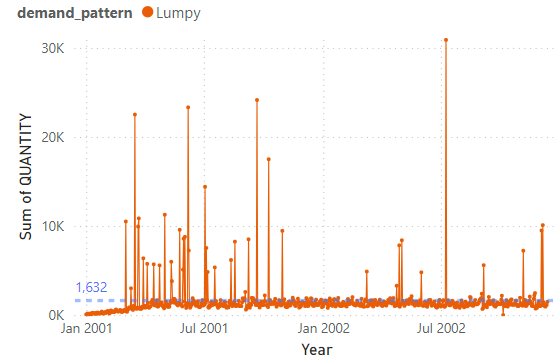

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df_qty_by_date['QUANTITY'], model='additive', period=30)

In [ ]:
# Extract decomposed components
df_qty_by_date['trend'] = decomposition.trend
df_qty_by_date['seasonal'] = decomposition.seasonal
df_qty_by_date['residual'] = decomposition.resid

In [ ]:
# Interpolate to handle NaNs in decomposed components
df_qty_by_date['trend'] = df_qty_by_date['trend'].fillna(0.1)
df_qty_by_date['seasonal'] = df_qty_by_date['seasonal'].fillna(0.1)
df_qty_by_date['residual'] = df_qty_by_date['residual'].fillna(0.1)

##Result

In [ ]:
df_qty_by_date

,DAY_ID,QUANTITY,trend,seasonal,residual
TRANS_date,,,,,
2001-01-01,1,71.0,0.1,-198.233114,0.1
2001-01-02,2,29.0,0.1,419.584310,0.1
2001-01-03,3,159.0,0.1,538.418401,0.1
2001-01-04,4,157.0,0.1,105.843401,0.1
2001-01-05,5,95.0,0.1,-190.262659,0.1
...,...,...,...,...,...
2002-11-26,695,813.0,0.1,-190.262659,0.1
2002-11-27,696,1117.0,0.1,-111.099023,0.1
2002-11-28,697,1331.0,0.1,-57.924781,0.1


In [ ]:
df_qty_by_date.describe()

,DAY_ID,QUANTITY,trend,seasonal,residual
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,350.000000,1613.057225,1579.376967,1.224945,1.651422
std,201.928205,2378.220890,640.402604,390.900572,2260.412705
min,1.000000,0.000100,0.100000,-504.902053,-3153.649370
25%,175.500000,1008.000000,1320.983333,-299.941447,-762.542137
50%,350.000000,1219.000000,1495.016667,-111.099023,-244.431280
75%,524.500000,1508.000000,1966.550000,105.843401,144.907043
max,699.000000,30893.000000,3374.083333,1137.566129,27543.467205


In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_qty_by_date.index, y=df_qty_by_date['trend'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of trend time series component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_qty_by_date.index, y=df_qty_by_date['seasonal'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of seasonal component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_qty_by_date.index, y=df_qty_by_date['residual'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of residual component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Perform ADF test on the residuals
adf_result = smt.adfuller(df_qty_by_date['QUANTITY'])
# Display ADF test results
print('ADF Statistic (Residuals):', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Decision based on p-value
if adf_result[1] <= 0.05:
    print("The residual component is stationary (reject null hypothesis).")
else:
    print("The residual component is non-stationary (fail to reject null hypothesis).")

ADF Statistic (Residuals): -25.183625801472722
p-value: 0.0
Critical Values:
   1%: -3.439753311961436
   5%: -2.8656896390914217
   10%: -2.568979777013325
The residual component is stationary (reject null hypothesis).


From time series components, the time series patterns are trend, seasonality and stationary.

# Model Training

In [ ]:
training_ratio = 0.8

## Naive Method

In [ ]:
# Split data into training and testing sets
train_size = int(len(df_qty_by_date) * training_ratio)  # 80% training data
train, test = df_qty_by_date[['DAY_ID','QUANTITY']].iloc[:train_size], df_qty_by_date[['DAY_ID','QUANTITY']].iloc[train_size:]

In [ ]:
train

,DAY_ID,QUANTITY
TRANS_date,,
2001-01-01,1,71.0
2001-01-02,2,29.0
2001-01-03,3,159.0
2001-01-04,4,157.0
2001-01-05,5,95.0
...,...,...
2002-07-09,555,30893.0
2002-07-10,556,1290.0
2002-07-11,557,1332.0


In [ ]:
# Naive Forecasting: Use the last observation from the training set
last_quantity_train = train['QUANTITY'].iloc[-1]

In [ ]:
# Forecast for the test set
test_forecast = pd.DataFrame({
    'DAY_ID': test['DAY_ID'],
    'FORECAST_QUANTITY': last_quantity_train,
    'ACTUAL_QUANTITY': test['QUANTITY']
})

### Evaluate model accuracy

Because there is an actual quantity as 0, then normalize RMSE (nRMSE) is used to evaluate model accuracy

In [ ]:
mean_qty_naive = test_forecast['FORECAST_QUANTITY'].mean()
mean_qty_naive

1275.0

In [ ]:
rmse_naive = calculate_rmse(test_forecast['ACTUAL_QUANTITY'], test_forecast['FORECAST_QUANTITY'])
rmse_naive

713.0704984181338

In [ ]:
print(f'nRMSE: {rmse_naive/mean_qty_naive}')

nRMSE: 0.5592709791514775


##Prophet

The column renaming is required because Prophet expects the input DataFrame to have specific column names:

- ds (datestamp): This column represents the date or time of the observation. Prophet requires the time series to have a ds column where the dates are stored.

- y (value): This column contains the target variable (i.e., the values you want to forecast). Prophet expects the target variable to be in a column named y.

In [ ]:
df_qty_by_date

,DAY_ID,QUANTITY,trend,seasonal,residual
TRANS_date,,,,,
2001-01-01,1,71.0,0.1,-198.233114,0.1
2001-01-02,2,29.0,0.1,419.584310,0.1
2001-01-03,3,159.0,0.1,538.418401,0.1
2001-01-04,4,157.0,0.1,105.843401,0.1
2001-01-05,5,95.0,0.1,-190.262659,0.1
...,...,...,...,...,...
2002-11-26,695,813.0,0.1,-190.262659,0.1
2002-11-27,696,1117.0,0.1,-111.099023,0.1
2002-11-28,697,1331.0,0.1,-57.924781,0.1


In [ ]:
df_data = df_qty_by_date.reset_index().copy()
df_data = df_data[['TRANS_date','QUANTITY']]
df_data.rename(columns={'TRANS_date': 'ds', 'QUANTITY': 'y'}, inplace=True)
df_data

,ds,y
0,2001-01-01,71.0
1,2001-01-02,29.0
2,2001-01-03,159.0
3,2001-01-04,157.0
4,2001-01-05,95.0
...,...,...
694,2002-11-26,813.0
695,2002-11-27,1117.0
696,2002-11-28,1331.0
697,2002-11-29,1535.0


In [ ]:
# Train-Test Split at 80%
train_size = int(len(df_data) * 0.8)
train_df = df_data.iloc[:train_size]
test_df = df_data.iloc[train_size:]

In [ ]:
# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkw5u_si0/1r_2dh6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkw5u_si0/hqoj0m1i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67960', 'data', 'file=/tmp/tmpkw5u_si0/1r_2dh6s.json', 'init=/tmp/tmpkw5u_si0/hqoj0m1i.json', 'output', 'file=/tmp/tmpkw5u_si0/prophet_model51p_tx44/prophet_model-20240819094226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:42:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:42:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make predictions on the test set
future_test = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast_test = model.predict(future_test.iloc[:len(test_df)])

In [ ]:
# Extract predictions for the test set
predictions_test = forecast_test['yhat'].values

### Evaluate model performance

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['y'], predictions_test))
mean_actual_test = test_df['y'].mean()
normalized_rmse = rmse / mean_actual_test
print(f'Normalized RMSE: {normalized_rmse}')

Normalized RMSE: 0.5709204930844652


Poorer performance than naive forecasting method.

## XGB Regressor

In [ ]:
df_data_xgb = df_qty_by_date.reset_index().copy()
df_data_xgb = df_data_xgb[['TRANS_date','DAY_ID','QUANTITY']]
# Convert TRANS_date to datetime
df_data_xgb['TRANS_date'] = pd.to_datetime(df_data_xgb['TRANS_date'])
# Create additional features
df_data_xgb['year'] = df_data_xgb['TRANS_date'].dt.year
df_data_xgb['month'] = df_data_xgb['TRANS_date'].dt.month
df_data_xgb['day_of_week'] = df_data_xgb['TRANS_date'].dt.dayofweek
df_data_xgb['day_of_year'] = df_data_xgb['TRANS_date'].dt.dayofyear
df_data_xgb

,TRANS_date,DAY_ID,QUANTITY,year,month,day_of_week,day_of_year
0,2001-01-01,1,71.0,2001,1,0,1
1,2001-01-02,2,29.0,2001,1,1,2
2,2001-01-03,3,159.0,2001,1,2,3
3,2001-01-04,4,157.0,2001,1,3,4
4,2001-01-05,5,95.0,2001,1,4,5
...,...,...,...,...,...,...,...
694,2002-11-26,695,813.0,2002,11,1,330
695,2002-11-27,696,1117.0,2002,11,2,331
696,2002-11-28,697,1331.0,2002,11,3,332
697,2002-11-29,698,1535.0,2002,11,4,333


In [ ]:
# Features and Target
X_xgb = df_data_xgb[['DAY_ID', 'year', 'month', 'day_of_week', 'day_of_year']]
y_xgb = df_data_xgb['QUANTITY']

In [ ]:
# Train-test split (0.8)
split_index = int(0.8 * len(df_data_xgb))
X_train_xgb, X_test_xgb = X_xgb [:split_index], X_xgb [split_index:]
y_train_xgb, y_test_xgb = y_xgb [:split_index], y_xgb [split_index:]

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize XGBRegressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_xgb, y_train_xgb)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.7}


In [ ]:
# Train the model with best parameters
model_xgb_best = grid_search.best_estimator_

y_pred_xgb = model_xgb_best.predict(X_test_xgb)

### Evaluate model performance

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
normalized_rmse_xgb = rmse_xgb / y_test_xgb.mean()
print(f"Normalized RMSE: {normalized_rmse_xgb }")

Normalized RMSE: 0.9418156909056424


## AutoARIMA

AutoARIMA is a function that automates the process of fitting an ARIMA or SARIMA model by automatically selecting the best parameters (p, d, q) based on the given time series data. The goal is to minimize the error metric (such as AIC or BIC) to choose the best model without requiring manual intervention, saving time and effort from traditional ARIMA or SARIMA, especially for complex datasets.

Key Features:
- Automatic Parameter Selection: Automatically selects the optimal values for p (AR order), d (differencing order), and q (MA order).
- Automates Stationarity and Seasonality Checks: It automatically performs differencing if needed to make the time series stationary, and tests for seasonality, sometimes leading to SARIMA-like models.
- Performance Metrics: Uses criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to select the model with the best fit.
- Built-in Cross-Validation: Some implementations support cross-validation, ensuring the model generalizes well.

In [ ]:
df_data_arima = df_data.copy()
df_data_arima.set_index('ds', inplace=True)
df_data_arima

,y
ds,
2001-01-01,71.0
2001-01-02,29.0
2001-01-03,159.0
2001-01-04,157.0
2001-01-05,95.0
...,...
2002-11-26,813.0
2002-11-27,1117.0
2002-11-28,1331.0


In [ ]:
# Train-Test Split at 80%
train_size_ARIMA = int(len(df_data_arima) * 0.8)
train_df_ARIMA = df_data_arima.iloc[:train_size]
test_df_ARIMA = df_data_arima.iloc[train_size:]

In [ ]:
# Fit the AutoARIMA model
model_ARIMA = auto_arima(train_df_ARIMA['y'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.85 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=10394.522, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=10397.299, Time=1.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=10397.381, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10582.463, Time=0.06 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=10396.496, Time=0.52 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=10396.481, Time=0.37 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=10395.398, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=10395.497, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=10397.414, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 11.798 seconds


Best Model based on the lowest AIC value.: The ARIMA(1,1,2)(0,0,0)[12]
- AR Order (p): 1
- Differencing Order (d): 1
- MA Order (q): 2
- Seasonal AR Order (P): 0
- Seasonal Differencing Order (D): 0
- Seasonal MA Order (Q): 0
- Seasonality: 12 periods (monthly data with yearly seasonality)

In [ ]:
len(test_df_ARIMA)

140

In [ ]:
# Forecast on the test set
n_test_periods = len(test_df_ARIMA)
forecast = model_ARIMA.predict(n_test_periods)

### Evaluate model performance

In [ ]:
rmse_ARIMA = np.sqrt(mean_squared_error(test_df_ARIMA['y'], forecast))
mean_actual_test_ARIMA = test_df_ARIMA['y'].mean()
normalized_rmse_ARIMA = rmse_ARIMA / mean_actual_test_ARIMA
print(f'Normalized RMSE: {normalized_rmse_ARIMA}')

Normalized RMSE: 0.5593041228706999


## Long Short-Term Memory (LSTM)

In [ ]:
# Set train-test split at 80%
train_size = int(len(df_qty_by_date) * 0.8)
test_size = len(df_qty_by_date) - train_size
train, test = df_qty_by_date.iloc[0:train_size], df_qty_by_date.iloc[train_size:len(df_qty_by_date)]

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['QUANTITY']])
test_scaled = scaler.transform(test[['QUANTITY']])

In [ ]:
# Prepare the dataset for LSTM
time_step = 3  # Choosing time step of 3 for LSTM
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [ ]:
# Reshape the input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the LSTM model
modelLSTM = Sequential()
modelLSTM.add(LSTM(64, activation = 'tanh',return_sequences=True, input_shape=(time_step, 1)))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(LSTM(64, activation = 'tanh',return_sequences=True, input_shape=(time_step, 1)))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(LSTM(64, activation = 'tanh',return_sequences=True, input_shape=(time_step, 1)))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(LSTM(32, activation = 'tanh'))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(Dense(1,activation = 'linear'))
modelLSTM.compile(loss='mse',optimizer='adam',metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
modelLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 3, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 3, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,393 (372.63 KB)

 Trainable params: 95,393 (372.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint('best_LSTMmodel.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8, verbose=1)

In [ ]:
hist_LSTM = modelLSTM.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32,
                    callbacks=[checkpoint, early_stopping, reduce_lr], verbose=1)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.4061e-04 - val_mse: 7.4061e-04 - learning_rate: 0.0010
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 5.8648e-04 - val_mse: 5.8648e-04 - learning_rate: 0.0010
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 5.3624e-04 - val_mse: 5.3624e-04 - learning_rate: 0.0010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 6.7157e-04 - val_mse: 6.7157e-04 - learning_rate: 0.0010
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mse: 0.0083
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 5.6463e-04 - val_mse: 5.6463e-04 - learning_rate: 0.0010
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.1591e-04 - va

In [ ]:
hist_dict_LSTM = hist_LSTM.history
hist_dict_LSTM

{'loss': [0.007734993938356638,
  0.00732148252427578,
  0.00748890545219183,
  0.007384766824543476,
  0.007334218360483646,
  0.007284116465598345,
  0.0072759962640702724,
  0.007344359997659922,
  0.00730160903185606,
  0.007353424560278654,
  0.007264992222189903,
  0.0073308516293764114],
 'mse': [0.007734993938356638,
  0.00732148252427578,
  0.00748890545219183,
  0.007384766824543476,
  0.007334218360483646,
  0.007284116465598345,
  0.0072759962640702724,
  0.007344359997659922,
  0.00730160903185606,
  0.007353424560278654,
  0.007264992222189903,
  0.0073308516293764114],
 'val_loss': [0.0007406108779832721,
  0.0005864807171747088,
  0.0005362423253245652,
  0.0006715672789141536,
  0.0005646315403282642,
  0.000615912489593029,
  0.0006382149294950068,
  0.0006007817573845387,
  0.0006007359479553998,
  0.0006129321409389377,
  0.0006114624557085335,
  0.0006118300370872021],
 'val_mse': [0.0007406108779832721,
  0.0005864807171747088,
  0.0005362423253245652,
  0.0006715

Text(0, 0.5, 'Loss')

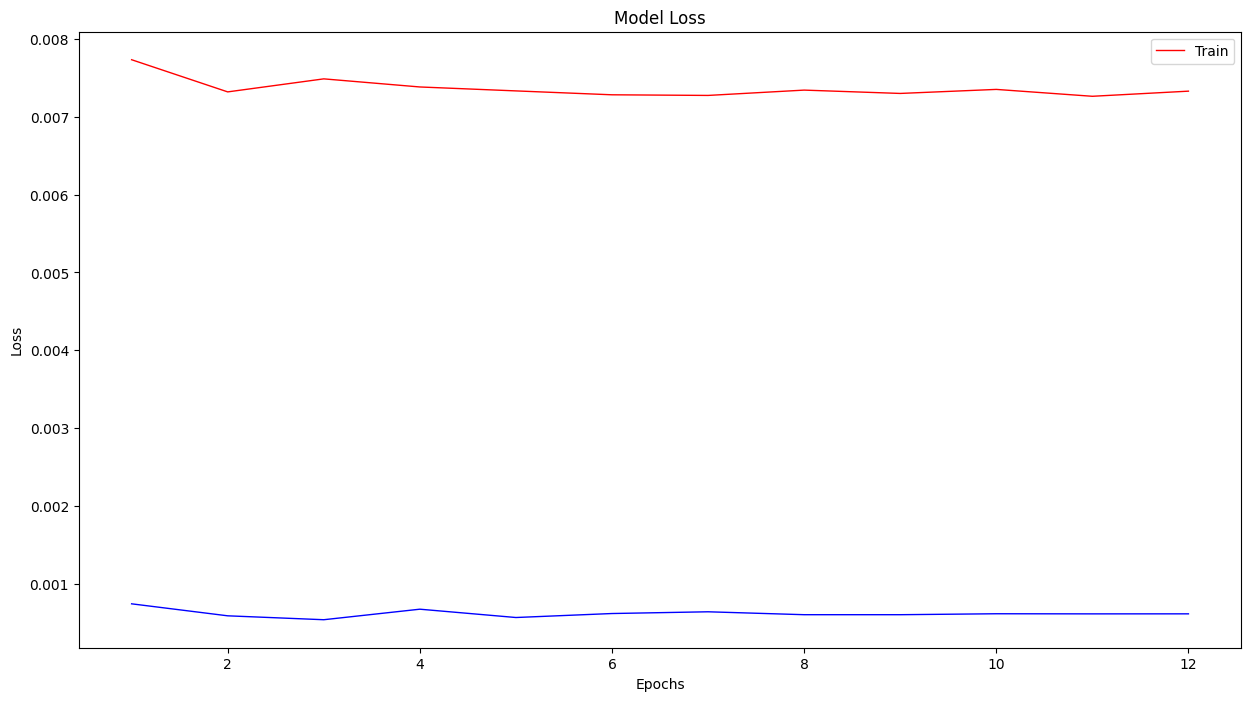

In [ ]:
loss_values = hist_dict_LSTM['loss']
val_loss_values = hist_dict_LSTM['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, loss_values, color='red', linewidth=1, markersize=2)
plt.plot(epochs, val_loss_values, color='blue', linewidth=1, markersize=2)
plt.title('Model Loss')
plt.legend(['Train'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

**Interpreting the Training History:**
- Loss Trend:
    
    The training loss (loss) is fairly stable, starting at 0.00732 and staying in a narrow range throughout the 12 epochs (updating slightly but not significantly decreasing). This indicates that `the model is learning but has reached a point where additional epochs are not leading to substantial improvements on the training set`.

- Validation Loss Trend:
    
    The validation loss (val_loss) is much lower than the training loss and is stable, starting at 0.000619 and ending at around the same value. This suggests that `the model is not overfitting but has converged to a point where it is performing well on unseen data`.

**Summary:**

Based on the stability of the validation loss and the low values for both the training and validation loss, **the model appears to possibly be usable for forecasting**. The fact that the validation loss is consistent and not increasing suggests that **the model is generalizing well to unseen data**, which is a good indicator of its usability.
- With such a small dataset, the LSTM model might have `limited capacity to learn complex patterns`, which is why the losses have stabilized early.
- The small dataset size means that further tuning (e.g., increasing model complexity, changing batch size, adjusting learning rates) `might not yield significant improvements`.

In [ ]:
modelLSTM.load_weights('best_LSTMmodel.keras')

In [ ]:
# Predictions for training and testing sets
train_predict = modelLSTM.predict(X_train)
test_predict = modelLSTM.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Inverse transform predictions and actual values for comparison
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

###Evaluate model

In [ ]:
test_predict.shape

(136, 1)

In [ ]:
rmse_LSTM = np.sqrt(mean_squared_error(y_test_actual[0], test_predict[:, 0]))
mean_test_actual_LSTM = np.mean(y_test_actual[0])
normalized_rmse_LSTM = rmse_LSTM / mean_test_actual_LSTM
print(f"Normalized RMSE: {normalized_rmse_LSTM }")

Normalized RMSE: 0.5181915938548685


In [ ]:
y_test_actual

array([[1.459e+03, 1.399e+03, 1.603e+03, 1.418e+03, 1.192e+03, 9.660e+02,
        9.040e+02, 8.550e+02, 1.315e+03, 1.410e+03, 1.014e+03, 9.960e+02,
        9.180e+02, 8.160e+02, 1.023e+03, 1.284e+03, 1.641e+03, 1.370e+03,
        1.077e+03, 1.006e+03, 8.710e+02, 9.870e+02, 1.515e+03, 1.350e+03,
        1.201e+03, 9.810e+02, 1.123e+03, 1.134e+03, 1.356e+03, 2.027e+03,
        1.958e+03, 1.214e+03, 1.078e+03, 1.154e+03, 1.041e+03, 1.418e+03,
        1.366e+03, 1.693e+03, 1.244e+03, 1.194e+03, 1.246e+03, 1.261e+03,
        1.349e+03, 1.520e+03, 1.713e+03, 1.762e+03, 1.887e+03, 2.403e+03,
        6.850e+02, 7.700e+02, 5.598e+03, 1.137e+03, 1.011e+03, 1.128e+03,
        1.035e+03, 8.770e+02, 1.390e+03, 1.551e+03, 2.032e+03, 1.209e+03,
        1.575e+03, 1.391e+03, 1.325e+03, 1.267e+03, 1.510e+03, 1.661e+03,
        1.057e+03, 1.214e+03, 9.410e+02, 1.082e+03, 1.182e+03, 1.437e+03,
        1.355e+03, 1.248e+03, 1.232e+03, 1.242e+03, 1.231e+03, 1.723e+03,
        2.178e+03, 1.465e+03, 1.000e+0

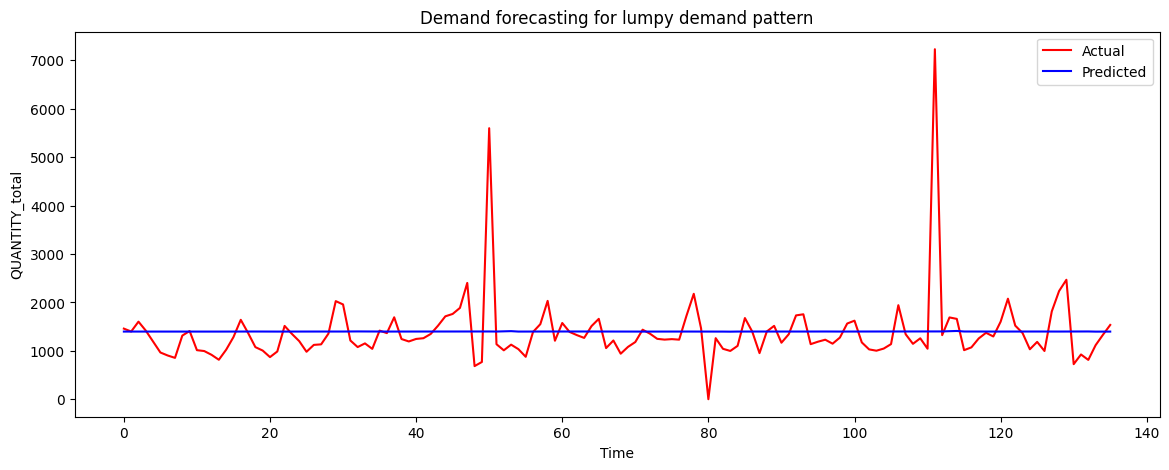

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test_actual[0], color = 'red', label = 'Actual')
plt.plot(test_predict, color = 'blue', label = 'Predicted')
plt.title('Demand forecasting for lumpy demand pattern')
plt.xlabel('Time')
plt.ylabel('QUANTITY_total')
plt.legend()
plt.show()

In [ ]:
test_predict

array([[1398.245 ],
       [1398.388 ],
       [1398.8287],
       [1399.4515],
       [1399.4913],
       [1399.5754],
       [1398.8635],
       [1398.1425],
       [1397.6155],
       [1397.6357],
       [1398.11  ],
       [1398.9358],
       [1398.6566],
       [1397.8403],
       [1397.6727],
       [1397.4938],
       [1397.6461],
       [1398.4961],
       [1399.293 ],
       [1399.5446],
       [1398.6561],
       [1397.953 ],
       [1397.7108],
       [1397.8091],
       [1398.5681],
       [1399.3317],
       [1398.7491],
       [1398.2701],
       [1398.0144],
       [1398.395 ],
       [1398.957 ],
       [1400.1257],
       [1401.0221],
       [1399.9768],
       [1398.4199],
       [1398.197 ],
       [1398.3744],
       [1398.5674],
       [1399.3729],
       [1399.457 ],
       [1399.55  ],
       [1398.6498],
       [1398.6198],
       [1398.7745],
       [1398.9773],
       [1399.4254],
       [1399.9973],
       [1400.4788],
       [1400.937 ],
       [1401.0386],


In [ ]:
# Flatten the arrays if needed
y_test_actual_flat = y_test_actual.flatten()
test_predict_flat = test_predict.flatten()

# Create the figure
fig = go.Figure()

# Add the actual values trace
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test_actual_flat)),  # Use indices as x-axis values
    y=y_test_actual_flat,
    mode='lines',
    name='Actual',
    line=dict(color='red')
))

# Add the predicted values trace
fig.add_trace(go.Scatter(
    x=np.arange(len(test_predict_flat)),  # Use indices as x-axis values
    y=test_predict_flat,
    mode='lines',
    name='Predicted',
    line=dict(color='blue')
))

# Update the layout with titles and labels
fig.update_layout(
    title='Demand Forecasting for Lumpy Demand Pattern',
    xaxis_title='Time',
    yaxis_title='QUANTITY_total',
    legend_title='Legend',
    width=1000,  # Equivalent to figsize=(14, 5) in inches
    height=500
)

# Show the plot
fig.show()

## Mean substitution

In [ ]:
print(f"Normalized RMSE with avg value: {np.sqrt(mean_squared_error(y_test_actual[0], np.full((136, 1), 1558, dtype=int)[:, 0]))/ mean_test_actual_LSTM}")

Normalized RMSE with avg value: 0.5336984303355287


# Forecast quantity

### Forecast future values from 2002-12-01 to 2003-03-31

Use result from LSTM RNN which achieve lowest nRMSE

In [ ]:
# Prepare to predict future data (2002-12-01 to 2003-03-31)
future_dates = pd.date_range(start='2002-12-01', periods=121, freq='D')
last_data = df_qty_by_date['QUANTITY'].values[-time_step:].reshape(-1, 1)
scaled_last_data = scaler.transform(last_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [ ]:
# Predict future values based on previous inputs
future_predictions = []
current_input = scaled_last_data.reshape(1, time_step, 1)

for _ in range(len(future_dates)):
    # Predict next value
    prediction = modelLSTM.predict(current_input)
    future_predictions.append(prediction[0, 0])

    # Update the input with the new prediction
    # Reshape prediction to match the dimensions of current_input
    prediction_reshaped = prediction.reshape(1, 1, 1)
    current_input = np.concatenate((current_input[:, 1:, :], prediction_reshaped), axis=1)

# Inverse transform future predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [ ]:
# Create DataFrame to store future predictions
forecast_df = pd.DataFrame({'TRANS_date': future_dates, 'QUANTITY_total': future_predictions.flatten()})
forecast_df['DAY_ID'] = range(700, 700 + len(forecast_df))
forecast_df = forecast_df[['TRANS_date','DAY_ID','QUANTITY_total']]
forecast_df

,TRANS_date,DAY_ID,QUANTITY_total
0,2002-12-01,700,1399.128052
1,2002-12-02,701,1399.117188
2,2002-12-03,702,1398.588745
3,2002-12-04,703,1399.249023
4,2002-12-05,704,1399.248657
...,...,...,...
116,2003-03-27,816,1399.249756
117,2003-03-28,817,1399.249756
118,2003-03-29,818,1399.249756
119,2003-03-30,819,1399.249756


## Disagregate forecast qty by product_id

In [ ]:
list_of_day = list(forecast_df['DAY_ID'])

In [ ]:
filtered_df = forecast_df[forecast_df['DAY_ID'] == 700].copy()
merged_df = pd.merge(filtered_df, df_qty_by_product[['PRODUCT_ID','Percent_product_share']], how='cross')
merged_df['QUANTITY'] = merged_df['QUANTITY_total'] * merged_df['Percent_product_share']
merged_df['QUANTITY'] = merged_df['QUANTITY'].astype(int)
merged_df = merged_df[merged_df['QUANTITY']>0]
merged_df = merged_df[['DAY_ID','PRODUCT_ID','QUANTITY']]
merged_df

,DAY_ID,PRODUCT_ID,QUANTITY
81,700,820165,7
95,700,822407,2
100,700,823704,1
101,700,823758,1
108,700,824555,2
...,...,...,...
3021,700,9677202,1
3152,700,10285144,1
3227,700,12263788,1
3230,700,12301109,1


In [ ]:
df_forecast_qty = pd.DataFrame()
for day in list_of_day:
  filtered_df = forecast_df[forecast_df['DAY_ID'] == day].copy()
  merged_df = pd.merge(filtered_df, df_qty_by_product[['PRODUCT_ID','Percent_product_share']], how='cross')
  merged_df['QUANTITY'] = merged_df['QUANTITY_total'] * merged_df['Percent_product_share']
  merged_df['QUANTITY'] = merged_df['QUANTITY'].astype(int)
  merged_df = merged_df[merged_df['QUANTITY']>0]
  merged_df = merged_df[['DAY_ID','PRODUCT_ID','QUANTITY']]
  df_forecast_qty = pd.concat([df_forecast_qty, merged_df], axis=0)
df_forecast_qty

,DAY_ID,PRODUCT_ID,QUANTITY
81,700,820165,7
95,700,822407,2
100,700,823704,1
101,700,823758,1
108,700,824555,2
...,...,...,...
3021,820,9677202,1
3152,820,10285144,1
3227,820,12263788,1
3230,820,12301109,1


In [ ]:
export_to_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/05_DemandForecasting/','Forecast_qty_04_Lumpy', df_forecast_qty )

Forecast_qty_04_Lumpy.csv has been exported successfully.
